In [1]:
import numpy as np
np.random.seed(254)
import matplotlib.pyplot as plt

from common.env_lib import csv_solar_harvester

In [2]:
# Get data for all years and store in a dictionary
annual_rec = {}
hmean_rec = []

for yr in range(1995,2019):
    harvester = csv_solar_harvester(location='tokyo', 
                                    year=yr,
                                    HENERGY_NOISE=0.0,
                                    PREDICTION_HORIZON=240*3, # lookahead horizon to predict energy
                                    PENERGY_NOISE=0.000)
    done = False
    henergy_rec=[]
    while not done:
        _,henergy,_,_,done = harvester.step()
        henergy_rec.append(henergy)
    hmean_rec.append(np.mean(henergy_rec))
    annual_rec[yr] = henergy_rec

In [3]:
all_batt = {}
all_henergy = {}
all_dc = {}

for yr in range(1995,2019):
    henergy_trace = np.array(annual_rec[yr])
    
    dc_trace = []
    batt_trace = []
    batt = 0
    
    hi_thrshld = 0.8
    lo_thrshld = 0.58

    hi_val = 1
    lo_val = 0.1
    for t in range(len(henergy_trace)):
        batt_trace.append(batt)
        if henergy_trace[t] > hi_thrshld:
            dc = hi_val
        elif henergy_trace[t] < lo_thrshld:
            dc = lo_val
        else:
            dc = henergy_trace[t]
        batt += (henergy_trace[t]-dc)*0.001
        dc_trace.append(dc)
    
    all_batt[yr] = batt_trace
    all_henergy[yr] = henergy_trace
    all_dc[yr] = dc_trace

(-0.5, 0.5)

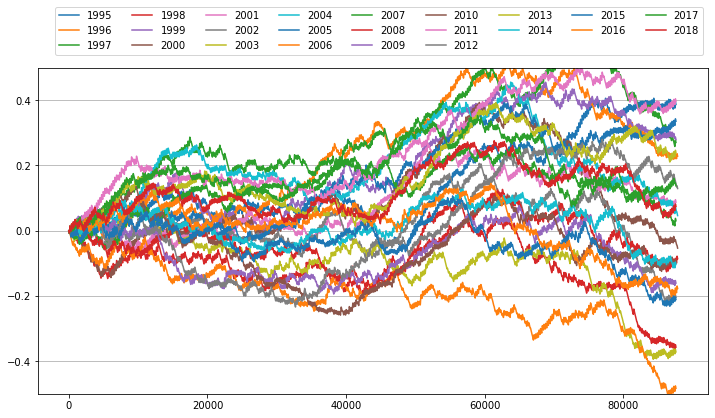

In [4]:
fig, ax = plt.subplots(1,figsize=(12, 6))
for key in all_batt:
    ax.plot(all_batt[key],label=str(key))
    ax.legend(loc="upper right",ncol=9,bbox_to_anchor=(0., 1.1, 1., .102))
    ax.yaxis.grid("True")
ax.set_ylim([-0.5,0.5])

(-0.5, 0.5)

/home/bhootmali/anaconda3/envs/rl/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


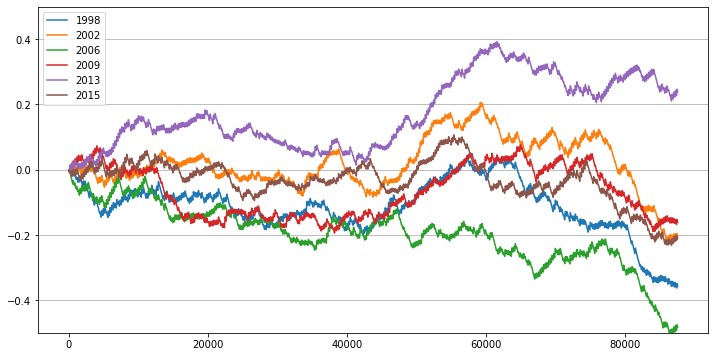

In [5]:
fig, ax = plt.subplots(1,figsize=(12, 6))
for key in [1998,2002,2006,2009,2013,2015]:
    ax.plot(all_batt[key],label=str(key))
    ax.legend()
    ax.yaxis.grid("True")
ax.set_ylim([-0.5,0.5])

(-0.5, 0.5)

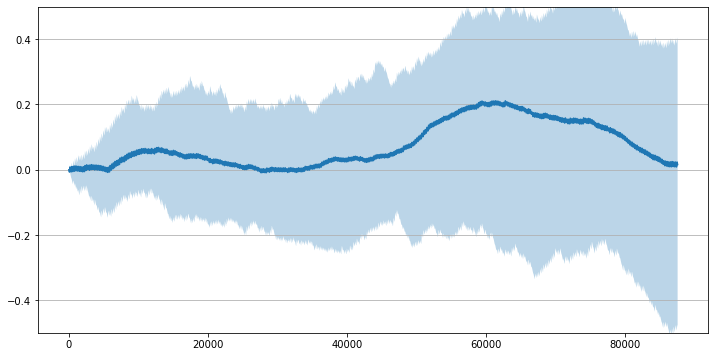

In [6]:
# leap year batt_traces are longer than non-leap years
# make all lengths same by cutting off the longer traces

batt_traces = list(all_batt.values())
min_length = min(map(len, batt_traces)) # get the list with least length of batt_traces

new_batt_traces = [trace[:min_length] for trace in batt_traces]
new_batt_traces = np.array(new_batt_traces)

all_batt_trace_mean = new_batt_traces.mean(axis=0)
all_batt_trace_min = new_batt_traces.min(axis=0)
all_batt_trace_max = new_batt_traces.max(axis=0)

fig, ax = plt.subplots(1,figsize=(12, 6))
t = np.arange(len(all_batt_trace_mean))
ax.fill_between(t,all_batt_trace_min,all_batt_trace_max, alpha=0.3)
ax.plot(t,all_batt_trace_mean)
ax.yaxis.grid("True")
ax.set_ylim([-0.5,0.5])

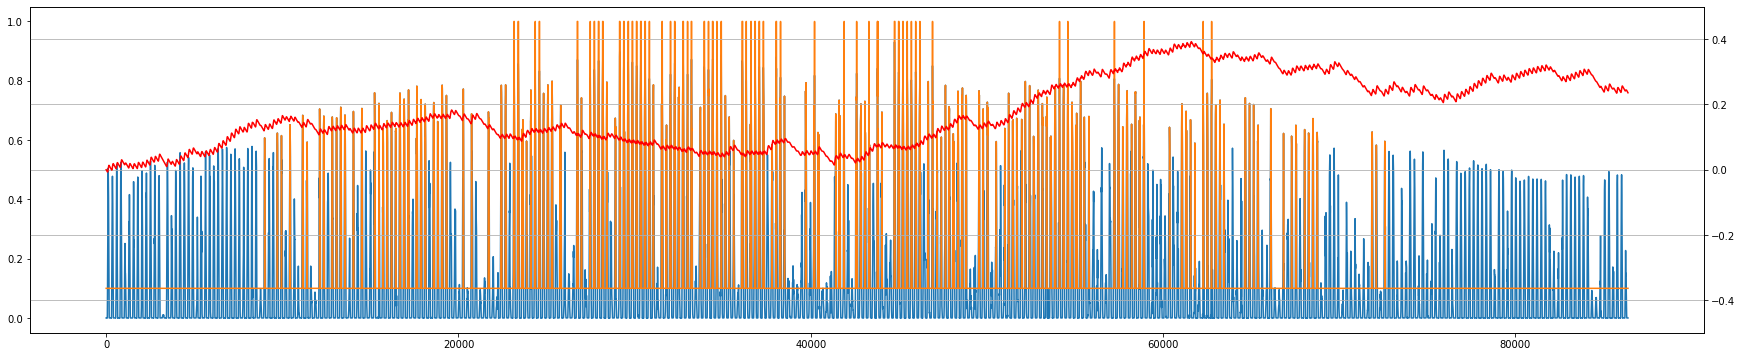

In [7]:
yr = 2013
start_day = 0
no_of_days = 360
end_day = start_day+no_of_days

start_index = start_day*240
end_index = end_day*240

fig, ax = plt.subplots(1,figsize=(30, 6))
ax.plot(all_henergy[yr][start_index:end_index])
ax.plot(all_dc[yr][start_index:end_index], '-')

ax2 = ax.twinx()
ax2.plot(all_batt[yr][start_index:end_index], color = 'r')
ax2.set_ylim([-0.5,0.5])
ax2.yaxis.grid(True)

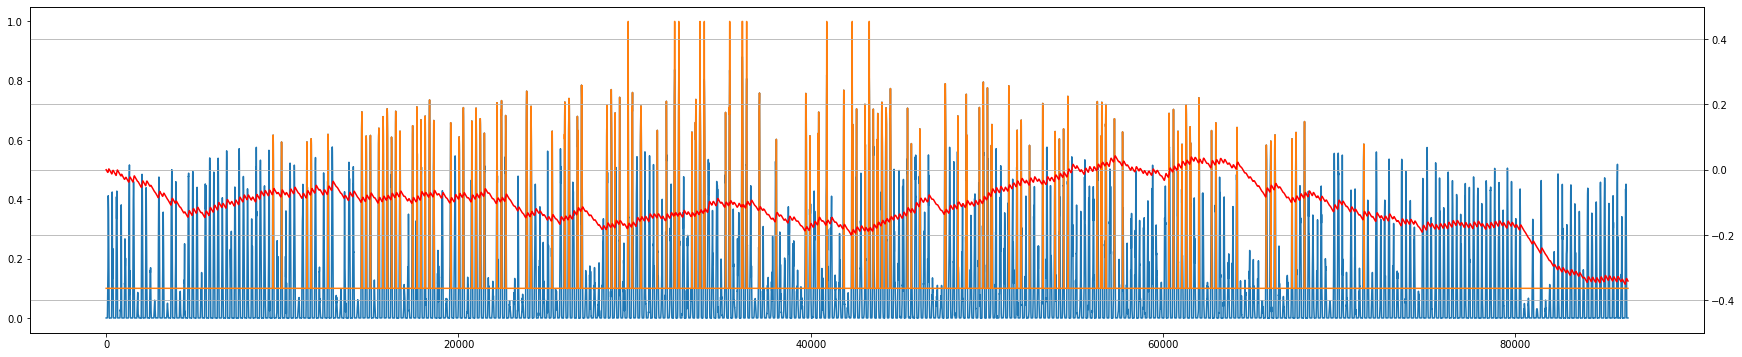

In [8]:
yr = 1998
start_day = 0
no_of_days = 360
end_day = start_day+no_of_days

start_index = start_day*240
end_index = end_day*240

fig, ax = plt.subplots(1,figsize=(30, 6))
ax.plot(all_henergy[yr][start_index:end_index])
ax.plot(all_dc[yr][start_index:end_index], '-')

ax2 = ax.twinx()
ax2.plot(all_batt[yr][start_index:end_index], color = 'r')
ax2.set_ylim([-0.5,0.5])
ax2.yaxis.grid(True)